#  Pruebas con IBM Quantum Platform Classic.

---

---

#### **Autor:** *Héctor Ayuso Martín*

![Imagen introduccion](assets/end.png
)

## Hello World del entrelazamiento cuántico: Estado de Bell de 2 qubits". ##

> Introducción práctica al entrelazamiento cuántico

Contexto inicial:

Se le llama "Hello World" porque es el ejemplo más simple y fundamental para demostrar cómo funciona un sistema cuántico con dos qubits, similar a cómo en programación clásica el primer ejercicio suele ser imprimir "Hello, World!'. Aquí en lugar de imprimir texto, mostramos el comportamiento básico del entrelazamiento cuántico, que es un concepto clave en la computación cuántica.

El entrelazamiento significa que los dos qubits están correlacionados de tal forma que, sin importar la distancia entre ellos, sus valores siempre estarán sincronizados. Es decir, si mides uno y obtienes un 0, el otro será 0, y si obtienes un 1, el otro será 1. Esto ocurre porque, en el estado de Bell, los qubits existen en una superposición compartida, lo que significa que no tienen un valor fijo hasta que se miden.

Este experimento demuestra un principio fundamental de la mecánica cuántica: el resultado de medir un qubit afecta instantáneamente al otro, lo que es una propiedad esencial para la computación cuántica y la criptografía cuántica.
En términos prácticos, esto se implementa con Qiskit creando un circuito cuántico con dos qubits, aplicando una puerta Hadamard (H) al primer qubit para ponerlo en superposición y luego una puerta CNOT (CX) para entrelazarlo con el segundo qubit. Luego se miden ambos qubits para ver la correlación en los resultados. En simulaciones, esto se verá reflejado en un histograma donde los únicos resultados posibles serán 00 y 11, mostrando que los qubits están entrelazados.
Llamamos a esto "Hello World" de la computación cuántica porque es la primera prueba sencilla que permite ver en acción uno de los fenómenos más importantes de la mecánica cuántica y la base para sistemas más avanzados, como algoritmos de corrección de errores y comunicación cuántica segura.

---

#### Paso 1: Representar el problema utulizando circuitos cuanticos y operadores ####

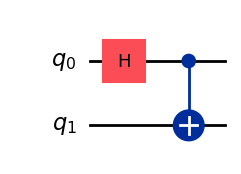

In [1]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0,1)

qc.draw('mpl')

In [ ]:
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

observables = [ ZZ,ZI,IZ,XX,XI,IX] #[Bug#01](Faltaba en la lista  el observable ZZ)

#### Paso 2: Optimizar. ####

En este ejemplo no se optimizará, debido a que el circuito será ejecutado en un simulador local y no en una QPU real. Los bloques de circuito y la algoritmia cuántica que sí vayan a ser procesados en QPUs reales deberán optimizarse para mejorar su estabilidad, evitar el mayor ruido de fondo posible y aumentar su productividad.

Recordemos que, a día de hoy, 28 de febrero de 2025, los qubits siguen siendo muy inestables y producen muchos errores debido a esa inestabilidad, lo que se refleja a la hora de graficar, por ejemplo, el colapso de un qubit en superposición estando entrelazado con otro. Como sabemos, estos dos qubits deberían acabar colapsando en |00) o |11), pero, como podríamos comprobar en los resultados graficados en una QPU real, también concluiríamos que, en muy poca medida, 'colapsan falsamente' en |01) y |10) por ruido de decoherencia o errores en la medición del qbit.

#### Paso 3: Ejecutar en el Simulador Backend ####

In [ ]:
from qiskit_aer.primitives import Estimator

estimator = Estimator()

job = estimator.run([qc] * len(observables), observables)

job.result()

print(type(job.result().values)) #Verificamos el tipo de values() para saber como acceder a los resultados.
print(job.result().values)      #Imprimimos los resultados para saber que tienen.

#Verificando cantidad de elementos:
print(f'Número de observables: {len(observables)}')
print(f'Número de valores devueltos: {len(job.result().values)}')
#Si el número de valores devueltos tiene menos elementos que el número de observables, entonces hay un problema en la longitud de los datos.

<class 'numpy.ndarray'>
[ 1.          0.06640625  0.06640625  1.         -0.0390625  -0.0390625 ]
Número de observables: 6
Número de valores devueltos: 6


#### Paso 4: Post-Procesado y graficado. ####

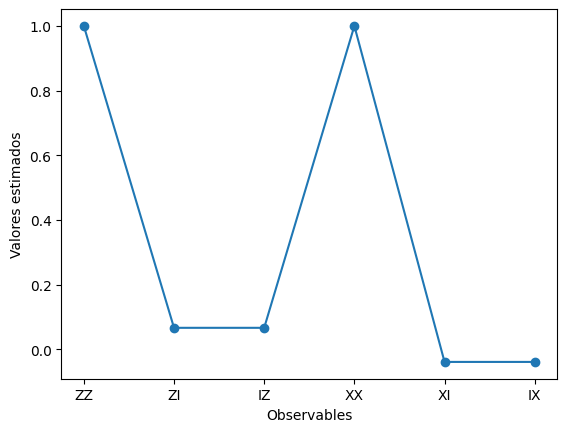

In [ ]:
import matplotlib.pyplot as plt

data = ['ZZ' , 'ZI' , 'IZ' , 'XX' , 'XI' , 'IX']
values = job.result().values

plt.plot(data,values,'-o')
plt.xlabel('Observables')
plt.ylabel('Valores estimados')
plt.show()

#

Explicación final:

Este cuaderno es una introducción a la programación cuántica usando IBM Quantum Platform. La idea principal es entender cómo funciona un sistema cuántico de dos qubits y cómo interactúan entre sí mediante un estado de Bell. Es un primer paso para ver en acción el entrelazamiento cuántico, un fenómeno esencial en la computación cuántica.

Para ello, se crea un circuito cuántico con dos qubits. Primero, se aplica una puerta Hadamard al primer qubit. Esto lo pone en superposición, es decir, no está en 0 ni en 1, sino en una mezcla de ambos estados al mismo tiempo. Luego, se aplica una puerta CNOT, que entrelaza ese primer qubit con el segundo. Esto significa que, cuando midamos uno de ellos, el otro cambiará automáticamente su valor para estar correlacionado.

El circuito se ejecuta en un simulador o en un procesador cuántico real (QPU). Si usamos un simulador, los resultados serán exactos y mostrarán solo los estados esperados (00 o 11). Sin embargo, si lo ejecutamos en un procesador real, pueden aparecer errores debido a la inestabilidad de los qubits, ruidos del sistema o imperfecciones en las puertas cuánticas. Esto podría hacer que, ocasionalmente, aparezcan estados 01 o 10 en los resultados, aunque en teoría no deberían existir.

El gráfico final muestra la probabilidad de cada posible resultado. Si todo funciona correctamente, los estados 00 y 11 deberían tener probabilidades cercanas al 50% y los estados 01 y 10 deberían aparecer muy poco o nada. Si hay ruido cuántico, podríamos ver una distribución diferente.

Los "observables" en este contexto son propiedades que se pueden medir del sistema cuántico, como si los qubits están alineados o no. La lista "data" representa los distintos observables que estamos analizando en el experimento, y los valores obtenidos reflejan lo que el sistema cuántico ha medido. Con esto, podemos evaluar la fidelidad del entrelazamiento y detectar posibles errores en la ejecución.

Este experimento es un primer acercamiento a la computación cuántica. A partir de aquí, se pueden explorar técnicas para minimizar errores y mejorar la calidad de los cálculos cuánticos en hardware real.

---

![Imagen introduccion](assets/end.png)

---

## Creando un estado GHZ con $n$-qubits a partir del estado de Bell anterior.


Un estado GHZ es una generalización del estado de Bell, pero para **multiples qbits**, en vez de solo para 2. En este estado, todos los qubits estan **entrelazados** y en **superposición**. El estado de superposición es coger los dos estados de posición de la computación clásica ( 0 ó 1), y aplicarlos a la vez. En superposición , al igual que el gato famoso, es 0 y 1 a la vez. No será uno u otro hasta que lo midamos, y entonces, colapasará a uno de los estados básicos de la computación clásica. El problema de no poder medir un qubit en superposición sin que colapse, en realidad es la utilidad de este tipo de computo: al no poder conocer su estado EXACTO hasta la medición, podemos explotar esta propiedad para realizar **calculos en paralelo**. Conclusión: La capacidad de resolver problemas muchisimo más rápido que en la computación clásica. 
Resumiendo, el estado GHZ no solo es capaz de demostrar el entrelazamiento a una escala mucho mayor que en el estado de Bell, además es una herramienta fundamental para aprovechar la ventaja cuántica en cada vez más tecnologiías, somo simulaciones, y **comunicaciones seguras**.

## Paso 1: Plantear el problema utilizando circuitos cuánticos y operadores

In [5]:
from qiskit import QuantumCircuit
import matplotlib.pyplot as plt


def obtener_circuito_GHZ(n):
    
    """Función para obtener un circuito de n qubits en estado GHZ. El parámetro n es el número de qubits del circuito."""
    qc = QuantumCircuit(n)
    qc.h(0)
    
    for i in range(n-1):
        qc.cx(i,i+1)
        
    return qc


n = 100
circuito = obtener_circuito_GHZ(n)
  

Ahora tenemos un circuito de cien (100) qubits entrelazados. A esta representación de entrelazamiento cuántico de qubits, siendo estos mas de dos, es el denominado estado GHZ.
GHZ por los físicos Greenberger, Horne y Zeilinger, quién ya propusieron este estado de entrelazamiento en el año 1989.

Los estados GHZ son importantes en computación cuántica porque muestran correlaciones cuánticas extremas, y son fundamentales en áreas como criptografía cuántica, corrección de errores cuánticos y protocolos de teleportación cuántica.


## Mediremos el ruido. Experimento para visualizar la decoherencia cuántica.

Al aumentar el número de qubits en un sistema entrelazado, la decoherencia y los errores cuánticos se vuelven más evidentes, afectando la estabilidad del estado cuántico.

In [7]:
from qiskit.quantum_info import SparsePauliOp

operator_strings = ['Z' + 'I' * i + 'Z' + 'I' * (n-2-i) for i in range(n-1)]
print(operator_strings[:3])
print(f'La longitud de la cadena de operadores es {len(operator_strings)}')

operators = [SparsePauliOp(operator_strings) for operator_strings in operator_strings]



['ZZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII']
La longitud de la cadena de operadores es 99


Este código está preparando los observables cuánticos que se usarán para analizar cómo se comporta un sistema cuántico de múltiples qubits. Es una herramienta fundamental en el estudio de correlaciones en computación cuántica.

## Optimización del problema para la ejecución cuántica.

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

Antes de poder acceder a las QPU's de IBM, necesitamos estar registrados, para obtener nuestra API del servicio.

In [56]:
from qiskit_ibm_runtime import QiskitRuntimeService
import configparser

#Cargarmos la API desde un archivo de configuración. Por seguridad y no exponer mi API key de IBM en público, en GitHub ;)
config = configparser.ConfigParser()
config.read('config.ini')
api_key = config['IBM']['api_key']

#Guardamos la cuenta en el servicio de IBM
QiskitRuntimeService.save_account(
    token=api_key,
    channel='ibm_quantum', 
    overwrite=True
)

print("Cuenta guardada correctamente.")


Cuenta guardada correctamente.


In [57]:
#Probamos la conexion con IBM:
service = QiskitRuntimeService()
print("Conectado a IBM Quantum correctamente.")




Conectado a IBM Quantum correctamente.


In [58]:
#Seleccionamos el Backend de IBM Brisbane
backend_name = 'ibm_brisbane'
backend = service.backend(backend_name)

IBM_BRISBANE es un QPU(Quantic Processing Unit) bastante moderna, con 127 qubits, porporcionado por IBM Quantum. Este backend representa un procesador cuántico real al que los usuarios como nosotros (simples mortales) podemos acceder para ejecutar nuestros circuitos.

In [59]:
pass_manager = generate_preset_pass_manager(optimization_level=1, backend=backend)

In [60]:
circuito_transpiled = pass_manager.run(circuito)

In [61]:
operators_transpiled_list = [op.apply_layout(circuito_transpiled.layout) for op in operators]

## Ejecución en el Backend

Vamos a importar las librerias necesarias, para poder mandar nuestro circuito a la máquina cuántica de IBM

In [62]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import EstimatorOptions

#Configuración del estimador e instanciación de opciones.
options = EstimatorOptions()
options.resilience_level = 1
options.dynamical_decoupling.enable = True
options.dynamical_decoupling.sequence_type = 'XY4'
#Instanciando Estimator con el backend seleccionado.
estimator = Estimator(backend, options=options)
#Creando el trabajo para la máquina.
job = estimator.run([(circuito_transpiled, operators_transpiled_list)])
#Obtenemos el ID del trabajo.
job_id = job.job_id()
#Printeamos:
link = 'https://quantum-computing.ibm.com/jobs'

print(f'El ID de nuestro job, en cola para {backend_name} es: {job_id}. Puedes consultar el QEUE en: {link}')

El ID de nuestro job, en cola para ibm_brisbane es: cz123qpp6030008bwhf0. Puedes consultar el QEUE en: https://quantum-computing.ibm.com/jobs


El código ha sido enviado. Ahora está viajando a través de la red hasta una máquina cuántica real en IBM, donde los qubits entrarán en juego, el ruido hará su parte y la computación cuántica mostrará su magia. No hay vuelta atrás, solo queda esperar y ver qué nos devuelve la máquina.
Esta QPU, se encuentra en las instalaciones de IBM en Ehningen, Alemania.

Podemos ir a la página de IBM en este punto, para buscar la id de nuestro trabajo en la cola de la QPU.

Enlace a la QEUE de espera de la QPU de IBM --> https://quantum-computing.ibm.com/jobs


[Haz click aquí para abrir el reporte en formato PDF del job, generado por 'ibm_brisbane'](assets/job.pdf)


![Imagen introduccion](assets/lab.webp
)

*Foto real de las instalaciones de IBM*

## Paso 4: Post-procesado y graficación

In [69]:
job_id = 'cz123qpp6030008bwhf0'
service = QiskitRuntimeService()
job = service.job(job_id)

Este código en Qiskit Runtime se usa para recuperar un trabajo cuántico previamente enviado a IBM Quantum, utilizando su Job ID

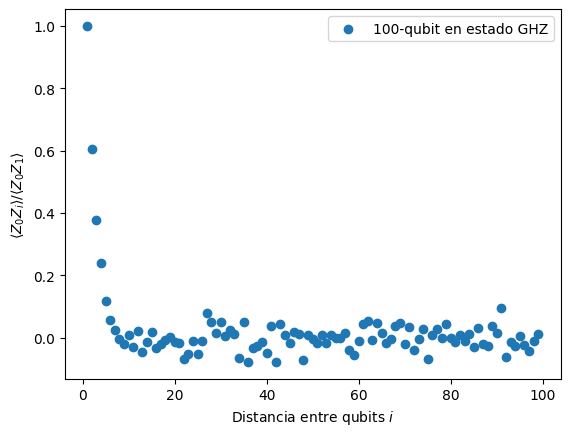

In [76]:
import matplotlib.pyplot as plt

data = list(range(1,len(operators)+1))
result = job.result()[0]
values  = result.data.evs
values = [v/ values[0] for v  in values]

plt.scatter(data , values, marker='o', label = '100-qubit en estado GHZ')
plt.xlabel('Distancia entre qubits $i$')
plt.ylabel(r'$\langle Z_0 Z_i \rangle / \langle Z_0 Z_1 \rangle$') #Notación Latex. Latex se usa para escribir fórmulas matemáticas, notación científica, etc.
plt.legend()
plt.show()

### Explicación / Analisis del resultado:

Fuerte correlación inicial: Para valores de i pequeños (cercanos a 0), los qubits están fuertemente correlacionados.

Decaimiento rápido: La correlación cae rápidamente, lo que es esperable en estados GHZ debido a la fragilidad de la coherencia cuántica cuando aumenta la separación.

Región de correlación baja y ruidosa: A partir de cierto punto (~30-40 en i), los valores oscilan alrededor de 0, lo que indica que la información cuántica se ha disipado y ya no hay correlación significativa entre los qubits alejados.

## Otros grafos:

In [ ]:
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as opt

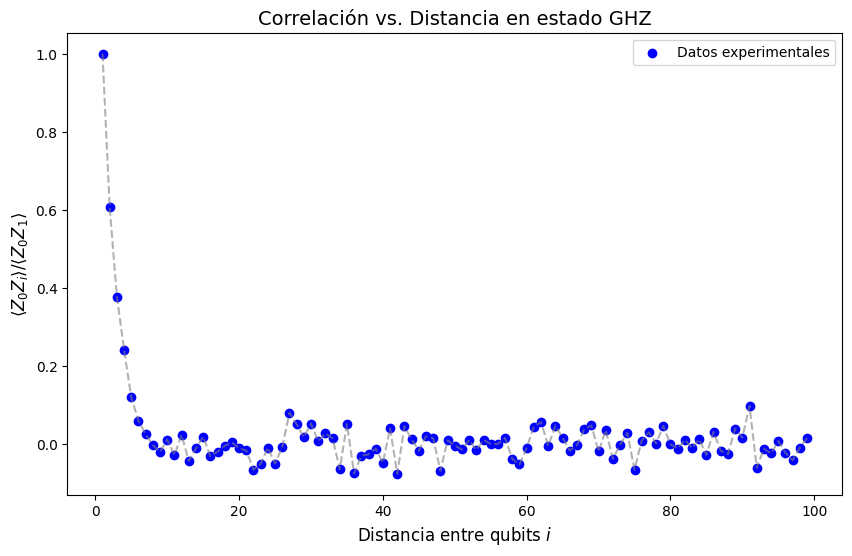

In [83]:
#GRÁFICO 1: Scatter y línea de la correlación vs distancia

data = list(range(1, len(values)+1))  # Distancia entre qubits i

plt.figure(figsize=(10, 6))
plt.scatter(data, values, color='blue', label='Datos experimentales')
plt.plot(data, values, linestyle='--', color='gray', alpha=0.6)
plt.xlabel('Distancia entre qubits $i$', fontsize=12)
plt.ylabel(r'$\langle Z_0 Z_i \rangle / \langle Z_0 Z_1 \rangle$', fontsize=12)
plt.title('Correlación vs. Distancia en estado GHZ', fontsize=14)
plt.legend()
plt.show()

Aquí ves un gráfico donde cada punto representa la correlación medida entre el qubit 0 y otro qubit a cierta "distancia" (o posición) en el circuito. La línea que une los puntos te ayuda a ver la tendencia general: ¿las correlaciones se van apagando a medida que te alejas del primer qubit o se mantienen bastante estables? 


---

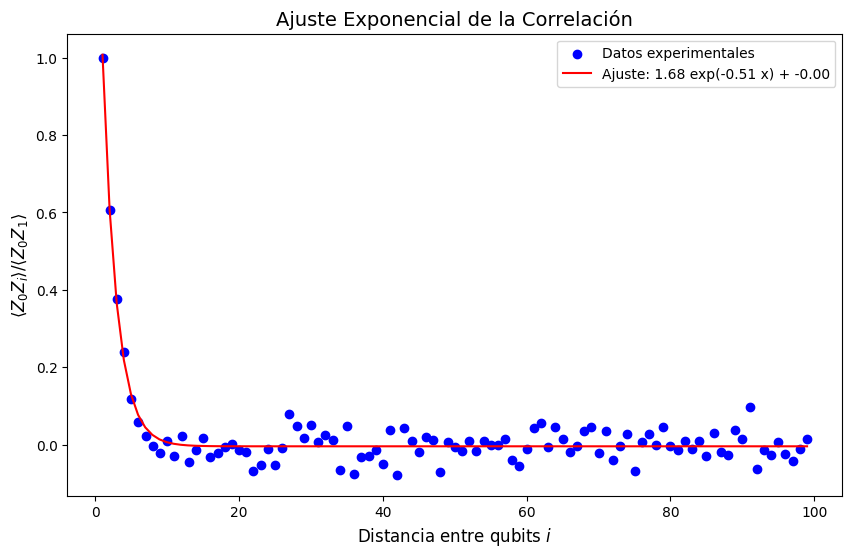

In [84]:
#GRÁFICO 2: Ajuste exponencial de l correlación.

# Definimos la función de ajuste.
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c

# Realizamos el ajuste.
params, _ = opt.curve_fit(exp_decay, data, values, p0=[1, 0.1, 0])
x_fit = np.linspace(min(data), max(data), 100)
y_fit = exp_decay(x_fit, *params)

plt.figure(figsize=(10, 6))
plt.scatter(data, values, color='blue', label='Datos experimentales')
plt.plot(x_fit, y_fit, 'r-', label=f'Ajuste: {params[0]:.2f} exp(-{params[1]:.2f} x) + {params[2]:.2f}')
plt.xlabel('Distancia entre qubits $i$', fontsize=12)
plt.ylabel(r'$\langle Z_0 Z_i \rangle / \langle Z_0 Z_1 \rangle$', fontsize=12)
plt.title('Ajuste Exponencial de la Correlación', fontsize=14)
plt.legend()
plt.show()

En este gráfico se intenta encajar una curva exponencial a los datos de correlación. La idea es comprobar si la correlación decae de forma exponencial con la distancia. La función de ajuste te dice, por ejemplo, qué tan rápido se pierde la correlación y si queda un “ruido” residual. Si la línea roja se pega bien a los datos, significa que el fenómeno sigue esa ley de decaimiento. 

---

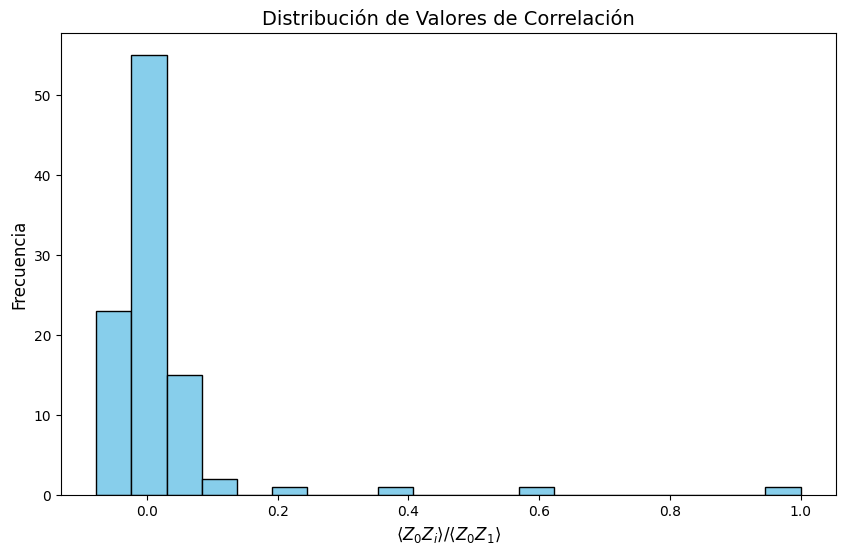

In [85]:
#GRÁFICO 3: Histograma de los valores de correlación.
plt.figure(figsize=(10, 6))
plt.hist(values, bins=20, color='skyblue', edgecolor='black')
plt.xlabel(r'$\langle Z_0 Z_i \rangle / \langle Z_0 Z_1 \rangle$', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de Valores de Correlación', fontsize=14)
plt.show()

Este gráfico te muestra la distribución de todos los valores de correlación obtenidos. Básicamente, es una forma de ver cuántas veces se repite cada rango de valores.

---

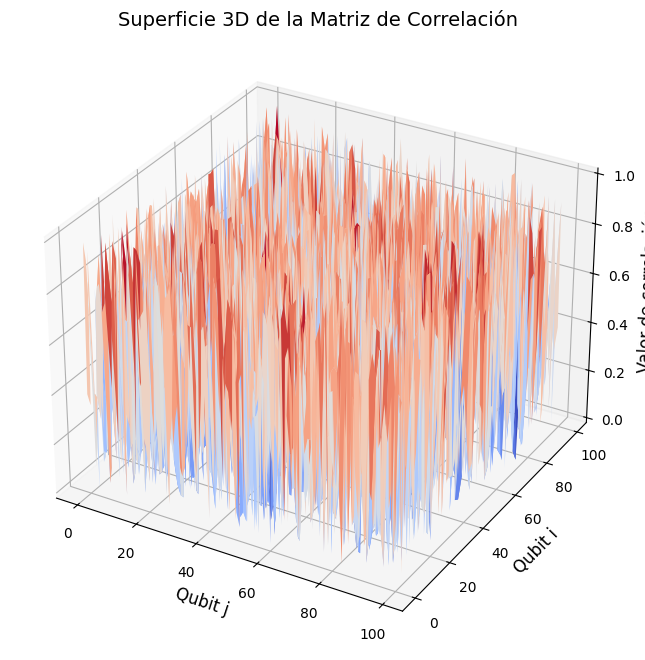

In [86]:
#GRÁFICO 4: Superficie 3D de la matriz de correlación.

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(np.arange(num_qubits), np.arange(num_qubits))
ax.plot_surface(X, Y, correlation_matrix, cmap='coolwarm', edgecolor='none')
ax.set_title('Superficie 3D de la Matriz de Correlación', fontsize=14)
ax.set_xlabel('Qubit j', fontsize=12)
ax.set_ylabel('Qubit i', fontsize=12)
ax.set_zlabel('Valor de correlación', fontsize=12)
plt.show()

Aquí se visualiza la matriz de correlación como una superficie en 3D. Cada punto en la superficie representa la correlación entre dos qubits (i y j). Este gráfico es muy útil para detectar patrones o "picos" en la interacción entre qubits. Es como ver un mapa topográfico, pero en vez de montañas y valles, tienes zonas de alta y baja correlación.

---

 ### Simular un experimento con 100 qubits en un procesador clásico es una tarea prácticamente inabordable. Cada qubit duplica el espacio de estados, lo que implica que para 100 qubits se deben considerar 2^100 estados distintos, es decir, alrededor de 1,27 x 10^30 amplitudes complejas. Esto implica que se necesitaría una cantidad de memoria inmensa, mucho mayor a la disponible en cualquier computadora actual.

 ### Además, aunque se dispusiera de una supercomputadora capaz de realizar 10^9 operaciones por segundo, el tiempo requerido para procesar todas estas operaciones se incrementaría de manera exponencial. En la práctica, simulaciones de circuitos cuánticos se han logrado con hasta 50 o 60 qubits utilizando recursos computacionales muy avanzados. Pasar a 100 qubits llevaría, en teoría, un tiempo que podría superar con creces la escala de tiempo práctica, llegando a <mark>requerir miles de años de computación</mark>, o incluso siendo imposible de realizar con la tecnología actual.

In [2]:
import pandas as pd

ruta = 'assets/workloads.csv'

df = pd.read_csv(ruta)

df



,ID,Status,Reason,Created,Completed,Usage (seconds),Mode,Compute resource,Instance,Name,Tags
0,cz123qpp6030008bwhf0,Completed,NaN,2025-02-28T20:51:42.247Z,2025-02-28T21:53:53.101Z,15,Job,ibm_brisbane,ibm-q/open/main,NaN,NaN


In [3]:
print(df['Usage (seconds)'])

0    15
Name: Usage (seconds), dtype: int64


## Según el DataFrame creado a través del CSV que IBM manda como feedback añadido a la ejecución en su máquina cuántica, generado con Pandas, la QPU IBM "ibm_brisbane" ha tenido un uso en ejecución de <mark>15 segundos.</mark>

---


Esta celda de reflexión final resume el trabajo realizado en este notebook y ofrece una visión detallada y accesible de cada uno de los pasos llevados a cabo en el experimento. 
En primer lugar, se construyó un circuito GHZ de 100 qubits.
Este circuito se diseñó para generar un estado cuántico altamente entrelazado en el que todos los qubits comparten la misma información, lo que es fundamental para explorar fenómenos de coherencia y correlación en sistemas cuánticos a gran escala.

El circuito se transpilo y se envió a una unidad de procesamiento cuántico real de IBM, ubicada en Alemania.
Esto permitió ejecutar el experimento en hardware cuántico, proporcionando datos reales sobre cómo se comporta el estado GHZ en presencia de ruidos y errores inherentes al procesamiento cuántico. 
Se evaluaron correlaciones entre qubits a diferentes distancias en el circuito, utlizando operadores específicos que miden la interacción entre el primer qubit y los demás. Los resultados obtenidos se normalizaron para facilitar l comparación y el análisis.

Se realizaron varios gráficos para visualizar los datos experimentales. 
Se presentó un gráfico de dispersión combinado con una línea de tendencia, en el que cada punto representa la correlación medida entre el qubit 0 y otro qubit a medida que aumenta su distancia. 
Además, se aplicó un ajuste exponencial a estos datos para investigar la tasa de decaimiento de la correlación, lo que puede indicar cómo se propaga la información en el sistema y cómo la decoherencia afecta a estados tan complejos. También se generó un histograma para observar la distribución de los valores de correlación, proporcionando una perspectiva estadística dl comportamiento del sistema. 
Por último, se incluyó un gráfico en tres dimensiones de la matriz de correlacion.

#### **El resultado** es interesante porque se comprueba empíricamente la estructura de las correlaciones en un estado altamente entrelazado y se observa cómo estas correlaciones se ven afectadas por el decaimiento, un fenómeno que resulta fundamental para entender la estabilidad y la robustez de los sistemas cuánticos en la práctica. Este experimento demuestra la capacidad de los dispositivos cuánticos modernos para generar y medir estados complejos, lo que es crucial para el avance de la computación cuántica y el desarrollo de algoritmos que aprovechen el entrelazamiento y la coherencia cuántica.

#### Además es un placer observar como el proceso de cálculo, el cual un super computador lógico en un laboratorio <mark>**tardaría miles de años**</mark>, IBM_Brisbane lo ha realizado en 15 segundos. Que tiemblen tus contraseñas con un buen diccionario y Brisbane en el lado oscuro.

![Imagen introduccion](assets/flag.png
)

Se recomienda leer el escrito de este Jupyter Notebook nº1, en la carpeta /Documentación/

<a href="Documentación/1_test_entrelazamiento_GHZ.txt" target="_blank">Pincha aquí para abrir</a>

> Barcelona, 28 de Febrero de 2025 